In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pls

In [2]:
df_pr = pd.read_csv("../data/poverty_rate_oecd.csv")

In [3]:
df_pr.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POVERTY,0_17,RT,A,2012,0.129,NaN
1,AUS,POVERTY,0_17,RT,A,2014,0.130,NaN
2,AUS,POVERTY,0_17,RT,A,2016,0.125,NaN
3,AUS,POVERTY,0_17,RT,A,2018,0.133,NaN
4,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN


In [4]:
codes = {'AFG': 'Afghanistan',
 'ALA': 'Aland Islands',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'ASM': 'American Samoa',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ATA': 'Antarctica',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BES': 'Bonaire, Saint Eustatius and Saba ',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BVT': 'Bouvet Island',
 'BRA': 'Brazil',
 'IOT': 'British Indian Ocean Territory',
 'VGB': 'British Virgin Islands',
 'BRN': 'Brunei',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CYM': 'Cayman Islands',
 'CAF': 'Central African Republic',
 'TCD': 'Chad',
 'CHL': 'Chile',
 'CHN': 'China',
 'CXR': 'Christmas Island',
 'CCK': 'Cocos Islands',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'COK': 'Cook Islands',
 'CRI': 'Costa Rica',
 'HRV': 'Croatia',
 'CUB': 'Cuba',
 'CUW': 'Curacao',
 'CYP': 'Cyprus',
 'CZE': 'Czech Republic',
 'COD': 'Democratic Republic of the Congo',
 'DNK': 'Denmark',
 'DJI': 'Djibouti',
 'DMA': 'Dominica',
 'DOM': 'Dominican Republic',
 'TLS': 'East Timor',
 'ECU': 'Ecuador',
 'EGY': 'Egypt',
 'SLV': 'El Salvador',
 'GNQ': 'Equatorial Guinea',
 'ERI': 'Eritrea',
 'EST': 'Estonia',
 'ETH': 'Ethiopia',
 'FLK': 'Falkland Islands',
 'FRO': 'Faroe Islands',
 'FJI': 'Fiji',
 'FIN': 'Finland',
 'FRA': 'France',
 'GUF': 'French Guiana',
 'PYF': 'French Polynesia',
 'ATF': 'French Southern Territories',
 'GAB': 'Gabon',
 'GMB': 'Gambia',
 'GEO': 'Georgia',
 'DEU': 'Germany',
 'GHA': 'Ghana',
 'GIB': 'Gibraltar',
 'GRC': 'Greece',
 'GRL': 'Greenland',
 'GRD': 'Grenada',
 'GLP': 'Guadeloupe',
 'GUM': 'Guam',
 'GTM': 'Guatemala',
 'GGY': 'Guernsey',
 'GIN': 'Guinea',
 'GNB': 'Guinea-Bissau',
 'GUY': 'Guyana',
 'HTI': 'Haiti',
 'HMD': 'Heard Island and McDonald Islands',
 'HND': 'Honduras',
 'HKG': 'Hong Kong',
 'HUN': 'Hungary',
 'ISL': 'Iceland',
 'IND': 'India',
 'IDN': 'Indonesia',
 'IRN': 'Iran',
 'IRQ': 'Iraq',
 'IRL': 'Ireland',
 'IMN': 'Isle of Man',
 'ISR': 'Israel',
 'ITA': 'Italy',
 'CIV': 'Ivory Coast',
 'JAM': 'Jamaica',
 'JPN': 'Japan',
 'JEY': 'Jersey',
 'JOR': 'Jordan',
 'KAZ': 'Kazakhstan',
 'KEN': 'Kenya',
 'KIR': 'Kiribati',
 'XKX': 'Kosovo',
 'KWT': 'Kuwait',
 'KGZ': 'Kyrgyzstan',
 'LAO': 'Laos',
 'LVA': 'Latvia',
 'LBN': 'Lebanon',
 'LSO': 'Lesotho',
 'LBR': 'Liberia',
 'LBY': 'Libya',
 'LIE': 'Liechtenstein',
 'LTU': 'Lithuania',
 'LUX': 'Luxembourg',
 'MAC': 'Macao',
 'MKD': 'Macedonia',
 'MDG': 'Madagascar',
 'MWI': 'Malawi',
 'MYS': 'Malaysia',
 'MDV': 'Maldives',
 'MLI': 'Mali',
 'MLT': 'Malta',
 'MHL': 'Marshall Islands',
 'MTQ': 'Martinique',
 'MRT': 'Mauritania',
 'MUS': 'Mauritius',
 'MYT': 'Mayotte',
 'MEX': 'Mexico',
 'FSM': 'Micronesia',
 'MDA': 'Moldova',
 'MCO': 'Monaco',
 'MNG': 'Mongolia',
 'MNE': 'Montenegro',
 'MSR': 'Montserrat',
 'MAR': 'Morocco',
 'MOZ': 'Mozambique',
 'MMR': 'Myanmar',
 'NAM': 'Namibia',
 'NRU': 'Nauru',
 'NPL': 'Nepal',
 'NLD': 'Netherlands',
 'ANT': 'Netherlands Antilles',
 'NCL': 'New Caledonia',
 'NZL': 'New Zealand',
 'NIC': 'Nicaragua',
 'NER': 'Niger',
 'NGA': 'Nigeria',
 'NIU': 'Niue',
 'NFK': 'Norfolk Island',
 'PRK': 'North Korea',
 'MNP': 'Northern Mariana Islands',
 'NOR': 'Norway',
 'OMN': 'Oman',
 'PAK': 'Pakistan',
 'PLW': 'Palau',
 'PSE': 'Palestinian Territory',
 'PAN': 'Panama',
 'PNG': 'Papua New Guinea',
 'PRY': 'Paraguay',
 'PER': 'Peru',
 'PHL': 'Philippines',
 'PCN': 'Pitcairn',
 'POL': 'Poland',
 'PRT': 'Portugal',
 'PRI': 'Puerto Rico',
 'QAT': 'Qatar',
 'COG': 'Republic of the Congo',
 'REU': 'Reunion',
 'ROU': 'Romania',
 'RUS': 'Russia',
 'RWA': 'Rwanda',
 'BLM': 'Saint Barthelemy',
 'SHN': 'Saint Helena',
 'KNA': 'Saint Kitts and Nevis',
 'LCA': 'Saint Lucia',
 'MAF': 'Saint Martin',
 'SPM': 'Saint Pierre and Miquelon',
 'VCT': 'Saint Vincent and the Grenadines',
 'WSM': 'Samoa',
 'SMR': 'San Marino',
 'STP': 'Sao Tome and Principe',
 'SAU': 'Saudi Arabia',
 'SEN': 'Senegal',
 'SRB': 'Serbia',
 'SCG': 'Serbia and Montenegro',
 'SYC': 'Seychelles',
 'SLE': 'Sierra Leone',
 'SGP': 'Singapore',
 'SXM': 'Sint Maarten',
 'SVK': 'Slovakia',
 'SVN': 'Slovenia',
 'SLB': 'Solomon Islands',
 'SOM': 'Somalia',
 'ZAF': 'South Africa',
 'SGS': 'South Georgia and the South Sandwich Islands',
 'KOR': 'South Korea',
 'SSD': 'South Sudan',
 'ESP': 'Spain',
 'LKA': 'Sri Lanka',
 'SDN': 'Sudan',
 'SUR': 'Suriname',
 'SJM': 'Svalbard and Jan Mayen',
 'SWZ': 'Swaziland',
 'SWE': 'Sweden',
 'CHE': 'Switzerland',
 'SYR': 'Syria',
 'TWN': 'Taiwan',
 'TJK': 'Tajikistan',
 'TZA': 'Tanzania',
 'THA': 'Thailand',
 'TGO': 'Togo',
 'TKL': 'Tokelau',
 'TON': 'Tonga',
 'TTO': 'Trinidad and Tobago',
 'TUN': 'Tunisia',
 'TUR': 'Turkey',
 'TKM': 'Turkmenistan',
 'TCA': 'Turks and Caicos Islands',
 'TUV': 'Tuvalu',
 'VIR': 'U.S. Virgin Islands',
 'UGA': 'Uganda',
 'UKR': 'Ukraine',
 'ARE': 'United Arab Emirates',
 'GBR': 'United Kingdom',
 'USA': 'United States',
 'UMI': 'United States Minor Outlying Islands',
 'URY': 'Uruguay',
 'UZB': 'Uzbekistan',
 'VUT': 'Vanuatu',
 'VAT': 'Vatican',
 'VEN': 'Venezuela',
 'VNM': 'Vietnam',
 'WLF': 'Wallis and Futuna',
 'ESH': 'Western Sahara',
 'YEM': 'Yemen',
 'ZMB': 'Zambia',
 'ZWE': 'Zimbabwe'}

In [5]:
for i in range(len(df_pr)):
    df_pr.loc[i,"LOCATION"]= codes[df_pr.loc[i,"LOCATION"]].upper()

In [6]:
df_pr.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUSTRALIA,POVERTY,0_17,RT,A,2012,0.129,NaN
1,AUSTRALIA,POVERTY,0_17,RT,A,2014,0.130,NaN
2,AUSTRALIA,POVERTY,0_17,RT,A,2016,0.125,NaN
3,AUSTRALIA,POVERTY,0_17,RT,A,2018,0.133,NaN
4,AUSTRALIA,POVERTY,TOT,RT,A,2012,0.140,NaN


In [7]:
df_pr = df_pr[df_pr["SUBJECT"]=="TOT"]

In [8]:
df_pr = df_pr.drop(columns = ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"])

In [9]:
df_sr = pd.read_csv("../data/master_oecd.csv")

In [26]:
df_sr_gr = df_sr.groupby(["country", "year"]).agg({"suicides_no":"sum", "population":"sum", "continent" : "max"})

In [27]:
df_sr_gr["s_rate"]=df_sr_gr["suicides_no"]/df_sr_gr["population"]*100000

In [28]:
df_merged =df_pr.merge(df_sr_gr,how="left", right_on = ["country", "year"], left_on = ["LOCATION", "TIME"])

In [29]:
df_merged = df_merged.dropna()

In [31]:
df_merged

,LOCATION,TIME,Value,suicides_no,population,continent,s_rate
0,AUSTRALIA,2012,0.140,2580.0,21238909.0,Oceania,12.147517
1,AUSTRALIA,2014,0.128,2891.0,21927587.0,Oceania,13.184305
4,AUSTRIA,2007,0.097,1285.0,7897272.0,Europe,16.271442
5,AUSTRIA,2008,0.093,1267.0,7925258.0,Europe,15.986861
6,AUSTRIA,2009,0.096,1278.0,7946894.0,Europe,16.081755
...,...,...,...,...,...,...,...
380,LITHUANIA,2012,0.143,927.0,2837770.0,Europe,32.666495
381,LITHUANIA,2013,0.124,1085.0,2806627.0,Europe,38.658504
382,LITHUANIA,2014,0.157,930.0,2781577.0,Europe,33.434271
383,LITHUANIA,2015,0.165,896.0,2753926.0,Europe,32.535370


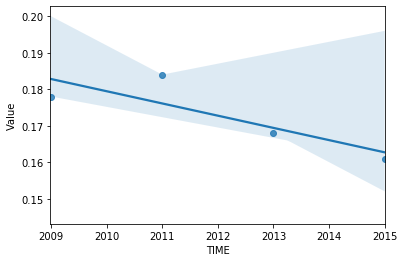

In [41]:
sns.regplot(data=df_merged[df_merged["continent"]=="S. america"], x = "TIME", y="Value")